### Exercise: Mini-Batch gradient descent

In [1]:
import pandas as pd
spreadsheet = pd.read_csv('./02_mini-batch-data.csv', delimiter = ',',header=None)
spreadsheet.head()

,0,1
0,-0.72407,2.23863
1,-2.40724,-0.00156
2,2.64837,3.01665
3,0.36092,2.31019
4,0.67312,2.05950


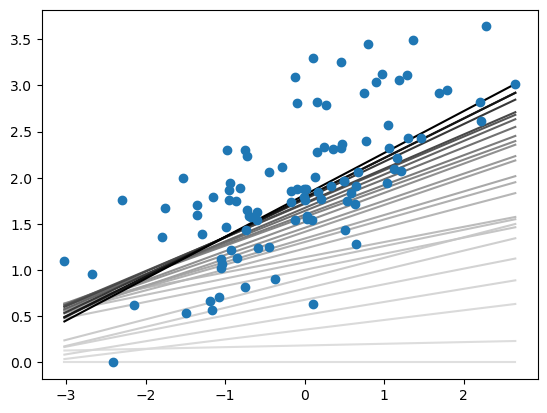

In [5]:
import numpy as np

np.random.seed(42)

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


# perform gradient descent
data = np.loadtxt('./03_mini-batch-data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()